# Goldsmiths University of London
# MSc Data Science and Artificial Intelligence
# Final Project in Data Science (2023-24)
# Supervisor: Dr V L Raju Chinthalapati
# Author: Alperen Unal - aunal001
# Student ID: 33804283

## Phase 3- GARCH Models

## 1. Utilised Modules

In [3]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from arch import arch_model
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

## 2. Data Preprocessing

In [5]:
prediction_df = pd.read_csv("prediction_scaled_log_returns.csv")
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31339 entries, 0 to 31338
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   spot_btc_coin_volume                  31339 non-null  float64
 1   futures_btc_close_price               31339 non-null  float64
 2   futures_btc_coin_volume               31339 non-null  float64
 3   futures_btc_coin_open_interest_close  31339 non-null  float64
 4   futures_btc_funding_rate              31339 non-null  float64
 5   futures_btc_CVD                       31339 non-null  float64
 6   futures_eth_close_price               31339 non-null  float64
 7   futures_eth_coin_open_interest_close  31339 non-null  float64
 8   futures_eth_funding_rate              31339 non-null  float64
 9   futures_eth_CVD                       31339 non-null  float64
 10  eth_etf                               31339 non-null  int64  
 11  btc_etf        

In [6]:
df = prediction_df[['futures_btc_close_price', 'futures_btc_coin_volume',
                    'futures_btc_coin_open_interest_close', 'futures_btc_funding_rate',
                    'futures_btc_CVD', 'log_returns', 'volatility']]

In [7]:

start_date = '2021-01-02 00:00:00'
end_date = '2024-07-30 18:00:00'
freq = 'H'  

datetime_index = pd.date_range(start=start_date, end=end_date, freq=freq)

df = df.set_index(datetime_index)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31339 entries, 2021-01-02 00:00:00 to 2024-07-30 18:00:00
Freq: H
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   futures_btc_close_price               31339 non-null  float64
 1   futures_btc_coin_volume               31339 non-null  float64
 2   futures_btc_coin_open_interest_close  31339 non-null  float64
 3   futures_btc_funding_rate              31339 non-null  float64
 4   futures_btc_CVD                       31339 non-null  float64
 5   log_returns                           31339 non-null  float64
 6   volatility                            31339 non-null  float64
dtypes: float64(7)
memory usage: 1.9 MB


## 3. Simple GARCH Models

Revisiting the Previous Model’s Analysis Results:

Based on the analysis conducted in the previous model, we can make the following observations:

#### 1.ACF and PACF Graphs Analysis:

When examining the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) graphs:

* ACF Graph: The ACF graph shows that the autocorrelations of the squared volatility decay slowly. This indicates that the volatility exhibits autocorrelation over a long period, suggesting that a GARCH model is appropriate for modeling this behavior.
* PACF Graph: In the PACF graph, we observe strong autocorrelations in the first few lags, with a particularly notable spike at the first lag (1). This implies that the AR (Autoregressive) terms have a strong influence on the model.

#### 2. Selection of p and q Values for the GARCH Model:

* p (AR terms): From the PACF graph, we can see that there is strong autocorrelation in the first few lags. Typically, a value of p=1 or p=2 would be a good starting point for such a model. This means that past volatility values significantly influence the current volatility.
* q (MA terms): The ACF graph shows a long decay, indicating that q=1 or q=2 would also be suitable. This allows the model to account for past shocks (such as significant price fluctuations) that may still impact current volatility.

Based on these insights, a GARCH(1,1) or GARCH(1,2) model would be appropriate. The GARCH(1,1) model is commonly used in financial data and generally provides reliable results. However, a GARCH(1,2) model might offer higher accuracy in capturing the volatility dynamics.

This introduction sets the stage for applying the GARCH model with the selected p and q parameters, based on the detailed analysis of ACF and PACF graphs from the previous model.

Since the log return value is a very small number, it is not suitable for use in GARCH models. Therefore, it was multiplied by 100 and scaled. However, when comparing with actual values, it will be divided by 100 and rescaled to make a correct comparison.

In [3]:
df['log_returns_100'] = df['log_returns'] * 100

In [4]:
# A GARCH model is defined based on hourly log returns
garch_model1 = arch_model(df['log_returns_100'], vol='Garch', p=1, q=1)

# The model is fitted to the data
garch_results1 = garch_model1.fit(disp='off')

# The summary of the model is printed
print(garch_results1.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:        log_returns_100   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -27362.7
Distribution:                  Normal   AIC:                           54733.4
Method:            Maximum Likelihood   BIC:                           54766.8
                                        No. Observations:                31339
Date:                Mon, Aug 26 2024   Df Residuals:                    31338
Time:                        01:40:12   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         7.3704e-04  2.716e-03      0.271      0.786 

In [5]:
garch_model2 = arch_model(df['log_returns_100'], vol='Garch', p=1, q=2)
garch_results2 = garch_model2.fit(disp='off')
print(garch_results2.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:        log_returns_100   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -27295.5
Distribution:                  Normal   AIC:                           54601.0
Method:            Maximum Likelihood   BIC:                           54642.7
                                        No. Observations:                31339
Date:                Mon, Aug 26 2024   Df Residuals:                    31338
Time:                        01:40:13   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         6.3086e-04  2.738e-03      0.230      0.818 

In [6]:
garch_model3 = arch_model(df['log_returns_100'], vol='Garch', p=2, q=2)
garch_results3 = garch_model3.fit(disp='off')
print(garch_results3.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:        log_returns_100   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -27295.5
Distribution:                  Normal   AIC:                           54603.0
Method:            Maximum Likelihood   BIC:                           54653.1
                                        No. Observations:                31339
Date:                Mon, Aug 26 2024   Df Residuals:                    31338
Time:                        01:40:13   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         6.3111e-04  2.740e-03      0.230      0.818 

In [7]:
garch_model4 = arch_model(df['log_returns_100'], vol='Garch', p=2, q=1)
garch_results4 = garch_model4.fit(disp='off')
print(garch_results4.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:        log_returns_100   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -27362.7
Distribution:                  Normal   AIC:                           54735.4
Method:            Maximum Likelihood   BIC:                           54777.2
                                        No. Observations:                31339
Date:                Mon, Aug 26 2024   Df Residuals:                    31338
Time:                        01:40:13   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         7.3710e-04  2.753e-03      0.268      0.789 

In [9]:
# Index Setting
start_date = '2021-01-02 00:00:00'
end_date = '2024-07-30 18:00:00'
freq = 'H'

datetime_index = pd.date_range(start=start_date, end=end_date, freq=freq)

df = df.set_index(datetime_index)

In [10]:
df

,futures_btc_close_price,futures_btc_coin_volume,futures_btc_coin_open_interest_close,futures_btc_funding_rate,futures_btc_CVD,log_returns,volatility,log_returns_100
2021-01-02 00:00:00,29215.89,11380.580,36013.363,0.000100,-1.080364e+04,-0.004142,0.005182,-0.414223
2021-01-02 01:00:00,29380.00,7693.401,35530.754,0.000100,-1.072782e+04,0.005601,0.004329,0.560143
2021-01-02 02:00:00,29347.02,6230.851,35781.508,0.000100,-1.051844e+04,-0.001123,0.004065,-0.112316
2021-01-02 03:00:00,29364.67,4118.911,35532.749,0.000100,-1.078220e+04,0.000601,0.004042,0.060124
2021-01-02 04:00:00,29363.03,4267.183,35487.117,0.000100,-1.094671e+04,-0.000056,0.004012,-0.005585
...,...,...,...,...,...,...,...,...
2024-07-30 14:00:00,65779.40,23581.410,84405.692,0.000050,-1.856454e+06,-0.008747,0.004975,-0.874706
2024-07-30 15:00:00,66198.00,20218.770,83619.759,0.000077,-1.856047e+06,0.006344,0.005225,0.634353
2024-07-30 16:00:00,66150.20,8097.586,83588.161,0.000092,-1.855806e+06,-0.000722,0.003993,-0.072234
2024-07-30 17:00:00,65839.80,15950.058,83142.319,0.000100,-1.856045e+06,-0.004703,0.004072,-0.470340


In [11]:
# Splitting
train_df = df.iloc[:-1440]
test_df = df.iloc[-1440:]


### 3.1. GARCH (1,1) Training & Testing

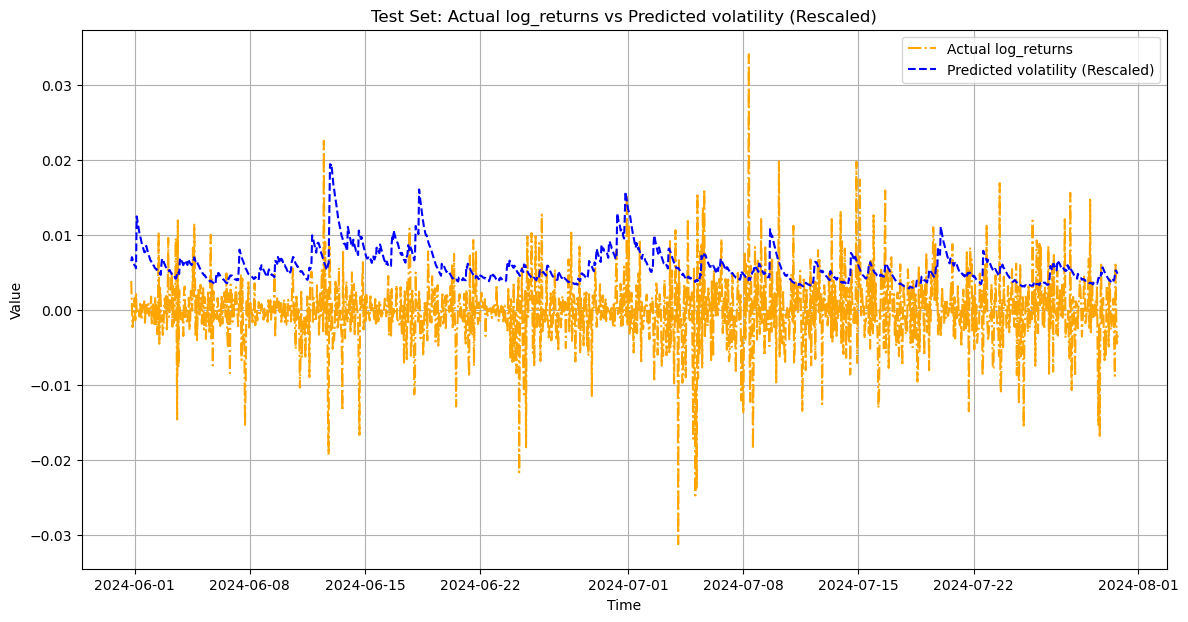

General Train MAE: 0.007443
General Test MAE: 0.006475


In [14]:
# Parameters
steps = len(test_df)
train_mae_values = []  
test_mae_values = []
test_length = len(test_df)  # Test set size based on the length of test_df

# Store all predictions and actual values for final combined plot
test_rolling_predictions = []
test_all_actuals = []


for i in range(test_length):
    
    train_set = train_df['log_returns_100'][:-(test_length-i)].copy()
    
    # Defining GARCH model with p=1 and q=1 (Simple GARCH model)
    model = arch_model(train_set, vol='GARCH', p=1, q=1)
    model_fit = model.fit(disp='off')
    
   
    train_pred = model_fit.conditional_volatility
    train_pred_rescaled = train_pred / 100  # Rescaling by dividing by 100 (log_returns_100 = log_returns * 100)
    
    # Calculation of MAE for the training set (with rescaled predictions)
    train_mae = mean_absolute_error(train_set / 100, train_pred_rescaled)
    train_mae_values.append(train_mae)
    
    
    val_pred = model_fit.forecast(horizon=1)
    val_pred_rescaled = np.sqrt(val_pred.variance.values[-1, :]) / 100  # Rescaling by dividing by 100

    # Store prediction and actual volatility
    test_rolling_predictions.append(val_pred_rescaled[0])
    test_all_actuals.append(test_df['volatility'].iloc[i])
    
    # Calculation of MAE for validation (with rescaled predictions)
    test_mae = mean_absolute_error([test_df['log_returns_100'].iloc[i] / 100], val_pred_rescaled)
    test_mae_values.append(test_mae)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(test_df.index[:test_length], test_df['log_returns_100'] / 100, label='Actual log_returns', color='orange', linestyle='-.')  # Actual log_returns
plt.plot(test_df.index[:test_length], test_rolling_predictions, label='Predicted volatility (Rescaled)', color='blue', linestyle='--')
plt.title('Test Set: Actual log_returns vs Predicted volatility (Rescaled)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Calculation of general MAE for the train and test set
general_train_mae = np.mean(train_mae_values)
general_test_mae = np.mean(test_mae_values)

print(f"General Train MAE: {general_train_mae:.6f}")
print(f"General Test MAE: {general_test_mae:.6f}")

### 3.2. GARCH( 1,2) Training & Testing

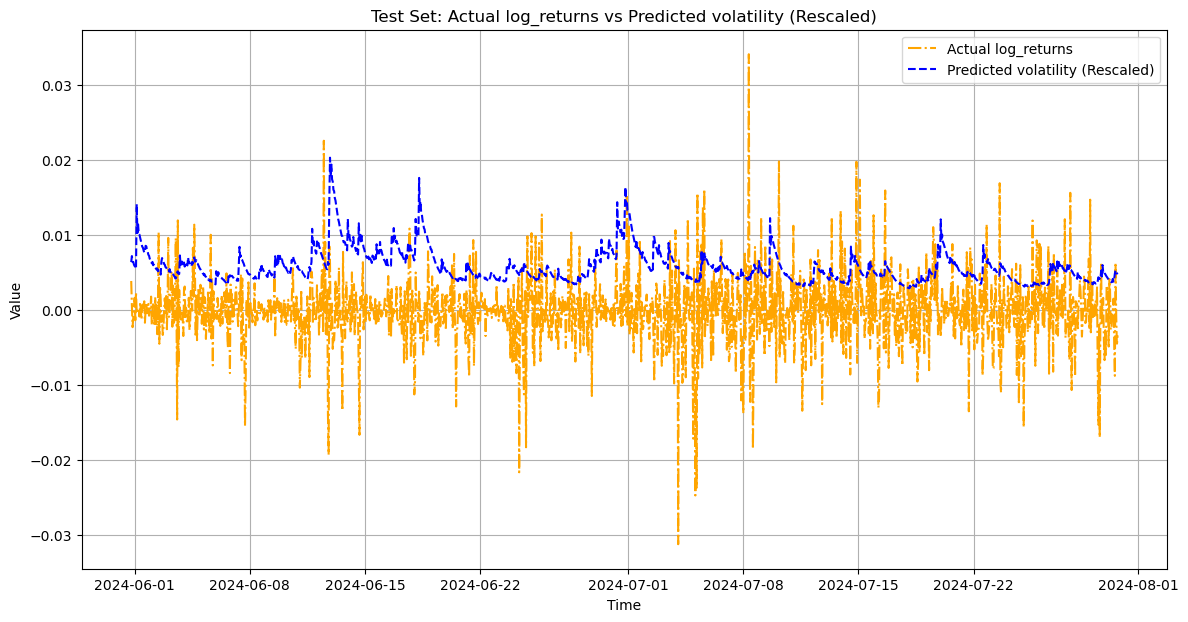

General Train MAE: 0.007422
General Test MAE: 0.006459


In [15]:
steps = len(test_df)
train_mae_values = []  
test_mae_values = []
test_length = len(test_df)  


test_rolling_predictions = []
test_all_actuals = []


for i in range(test_length):
 
    train_set = train_df['log_returns_100'][:-(test_length-i)].copy()
    
    # Defining GARCH model with p=1 and q=2 (Simple GARCH model)
    model = arch_model(train_set, vol='GARCH', p=1, q=2)
    model_fit = model.fit(disp='off')
    
    
    train_pred = model_fit.conditional_volatility
    train_pred_rescaled = train_pred / 100  # Rescale by dividing by 100
    
    
    train_mae = mean_absolute_error(train_set / 100, train_pred_rescaled)
    train_mae_values.append(train_mae)
    
  
    val_pred = model_fit.forecast(horizon=1)
    val_pred_rescaled = np.sqrt(val_pred.variance.values[-1, :]) / 100  # Rescale by dividing by 100

   
    test_rolling_predictions.append(val_pred_rescaled[0])
    test_all_actuals.append(test_df['volatility'].iloc[i])
    
 
    test_mae = mean_absolute_error([test_df['log_returns_100'].iloc[i] / 100], val_pred_rescaled)
    test_mae_values.append(test_mae)


plt.figure(figsize=(14, 7))
plt.plot(test_df.index[:test_length], test_df['log_returns_100'] / 100, label='Actual log_returns', color='orange', linestyle='-.')  # Actual log_returns
plt.plot(test_df.index[:test_length], test_rolling_predictions, label='Predicted volatility (Rescaled)', color='blue', linestyle='--')
plt.title('Test Set: Actual log_returns vs Predicted volatility (Rescaled)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


general_train_mae = np.mean(train_mae_values)
general_test_mae = np.mean(test_mae_values)

print(f"General Train MAE: {general_train_mae:.6f}")
print(f"General Test MAE: {general_test_mae:.6f}")

### 3.3. GARCH ( 2,1) Training & Testing 

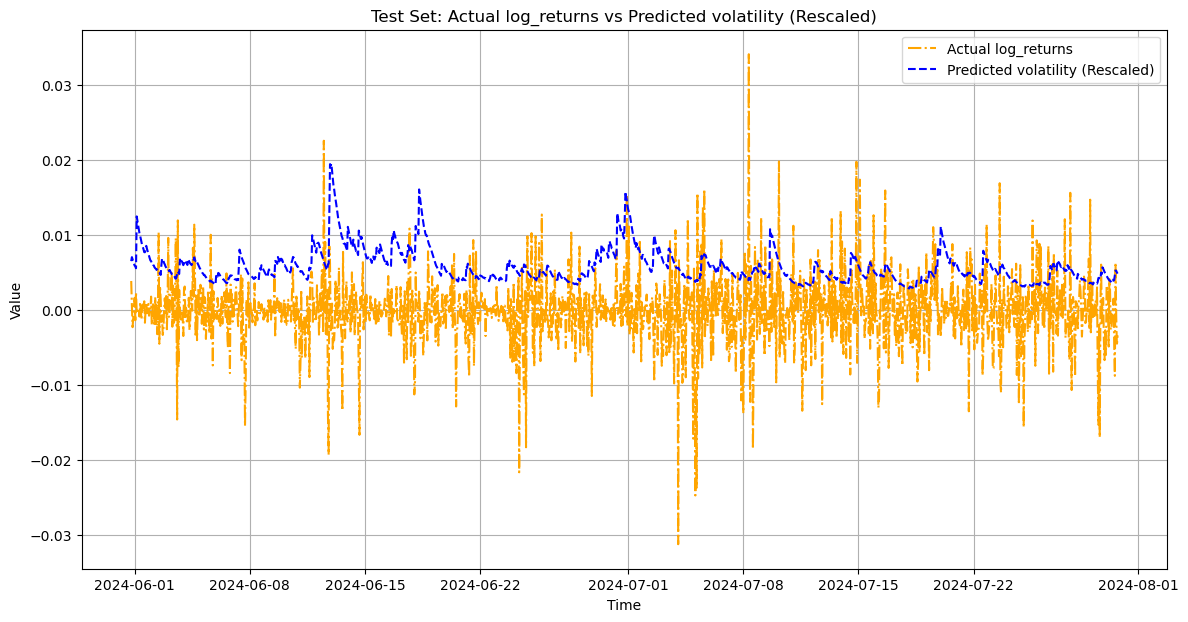

General Train MAE: 0.007443
General Test MAE: 0.006475


In [16]:
# Parameters
steps = len(test_df)
train_mae_values = []  
test_mae_values = []
test_length = len(test_df)  


test_rolling_predictions = []
test_all_actuals = []


for i in range(test_length):
    
    train_set = train_df['log_returns_100'][:-(test_length-i)].copy()
    
    # Defining GARCH model with p=2 and q=1 (Simple GARCH model)
    model = arch_model(train_set, vol='GARCH', p=2, q=1)
    model_fit = model.fit(disp='off')
    
    
    train_pred = model_fit.conditional_volatility
    train_pred_rescaled = train_pred / 100  # Rescale by dividing by 100
    
    # Calculate MAE for the training set (with rescaled predictions)
    train_mae = mean_absolute_error(train_set / 100, train_pred_rescaled)
    train_mae_values.append(train_mae)
    
    # Make test prediction
    val_pred = model_fit.forecast(horizon=1)
    val_pred_rescaled = np.sqrt(val_pred.variance.values[-1, :]) / 100  # Rescale by dividing by 100

    # Store prediction and actual volatility
    test_rolling_predictions.append(val_pred_rescaled[0])
    test_all_actuals.append(test_df['volatility'].iloc[i])
    
    
    test_mae = mean_absolute_error([test_df['log_returns_100'].iloc[i] / 100], val_pred_rescaled)
    test_mae_values.append(test_mae)


plt.figure(figsize=(14, 7))
plt.plot(test_df.index[:test_length], test_df['log_returns_100'] / 100, label='Actual log_returns', color='orange', linestyle='-.')  # Actual log_returns
plt.plot(test_df.index[:test_length], test_rolling_predictions, label='Predicted volatility (Rescaled)', color='blue', linestyle='--')
plt.title('Test Set: Actual log_returns vs Predicted volatility (Rescaled)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


general_train_mae = np.mean(train_mae_values)
general_test_mae = np.mean(test_mae_values)

print(f"General Train MAE: {general_train_mae:.6f}")
print(f"General Test MAE: {general_test_mae:.6f}")

### 3.4. GARCH (2,2) Training & Testing

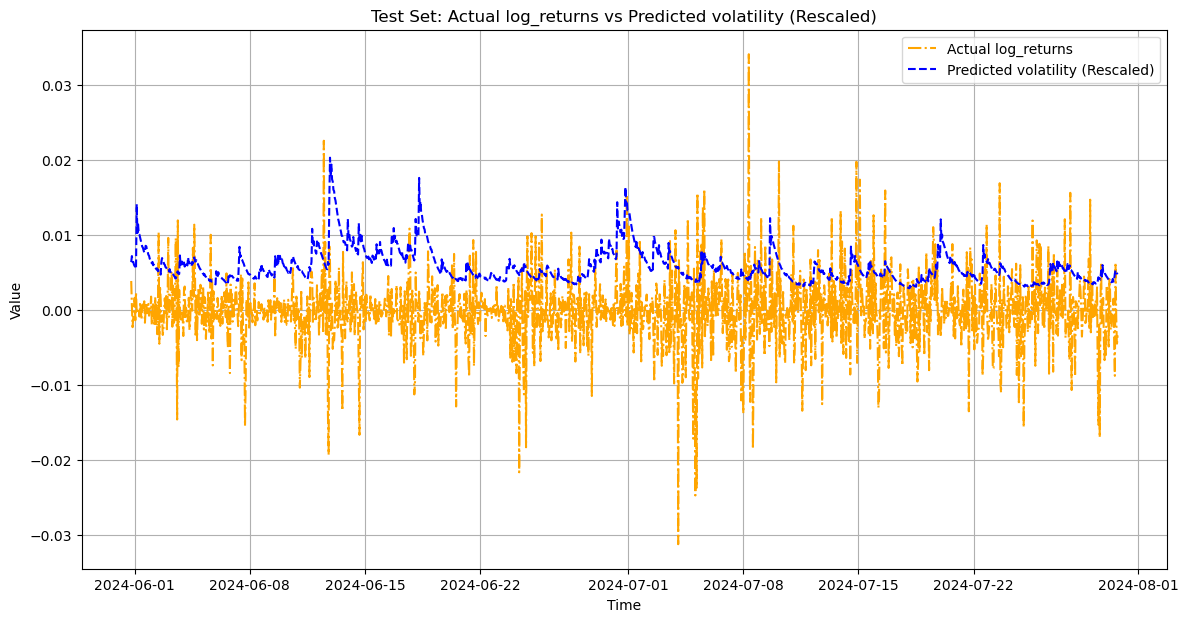

General Train MAE: 0.007422
General Test MAE: 0.006459


In [17]:
steps = len(test_df)
train_mae_values = []  
test_mae_values = []
test_length = len(test_df) 
# Store all predictions and actual values for final combined plot
test_rolling_predictions = []
test_all_actuals = []


for i in range(test_length):
    
    train_set = train_df['log_returns_100'][:-(test_length-i)].copy()
    
    
    model = arch_model(train_set, vol='GARCH', p=2, q=2)
    model_fit = model.fit(disp='off')
    

    train_pred = model_fit.conditional_volatility
    train_pred_rescaled = train_pred / 100  # Rescale by dividing by 100
    
   
    train_mae = mean_absolute_error(train_set / 100, train_pred_rescaled)
    train_mae_values.append(train_mae)
    
   
    val_pred = model_fit.forecast(horizon=1)
    val_pred_rescaled = np.sqrt(val_pred.variance.values[-1, :]) / 100  # Rescale by dividing by 100

   
    test_rolling_predictions.append(val_pred_rescaled[0])
    test_all_actuals.append(test_df['volatility'].iloc[i])
    
    
    test_mae = mean_absolute_error([test_df['log_returns_100'].iloc[i] / 100], val_pred_rescaled)
    test_mae_values.append(test_mae)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(test_df.index[:test_length], test_df['log_returns_100'] / 100, label='Actual log_returns', color='orange', linestyle='-.')  # Actual log_returns
plt.plot(test_df.index[:test_length], test_rolling_predictions, label='Predicted volatility (Rescaled)', color='blue', linestyle='--')
plt.title('Test Set: Actual log_returns vs Predicted volatility (Rescaled)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


general_train_mae = np.mean(train_mae_values)
general_test_mae = np.mean(test_mae_values)

print(f"General Train MAE: {general_train_mae:.6f}")
print(f"General Test MAE: {general_test_mae:.6f}")

## 4 Conclusion

#### 1. p=1, q=1 (First Graph)

General Train MAE: 0.007443
General Test MAE: 0.006475

This is a simple GARCH(1,1) model and provides basic volatility modeling. The Mean Absolute Error (MAE) values for both the training and test sets are very close, indicating that the model generally exhibits stable performance. However, there may be occasional deviations in the return volatility predictions.

#### p=1, q=2 (Second Graph)

General Train MAE: 0.007422
General Test MAE: 0.006459

This model uses a GARCH(1,2) configuration, slightly improving its ability to predict volatility. The Train and Test MAE values are slightly lower than the GARCH(1,1) model, indicating improved performance. However, there may still be some inconsistencies in the fluctuations of return volatility predictions.

##### p=2, q=1 (Third Graph)

General Train MAE: 0.007443
General Test MAE: 0.006475

The GARCH(2,1) model exhibits similar performance to the configurations above. The MAE values are identical to the GARCH(1,2) model, indicating that this configuration does not make a significant difference in return volatility predictions. However, differences might emerge under different market conditions.

#### p=2, q=2 (Fourth Graph)

General Train MAE: 0.007422
General Test MAE: 0.006459

This model uses the GARCH(2,2) configuration. The training and test MAE values are very similar to the p=1, q=1 model. This suggests that increasing the p and q values does not necessarily improve model performance. The model’s generalization ability seems to remain stable as complexity increases.

##### Best Model:

Considering the MAE values and the graphs, the model with p=1 and q=2 appears to offer the most balanced performance. This model provides the lowest error in both training and test data, making it a more reliable choice for return volatility predictions.

#### Evaluation of the Graph:

* Overall Performance of Predictions: In the GARCH(1,2) model, a generally consistent relationship is observed between the return volatility predictions. (blue dashed line) and the actual log_returns (orange line). The predicted values follow the actual values quite well, though there may be some limitations in capturing volatility spikes.

* MAE Values: The MAE values obtained for both the training and test data indicate that the model’s predictions are quite accurate, with no significant differences from the actual values. The closeness of the training and test MAE values suggests that the model is not overfitting and has good generalization capability.